In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### laod data

In [2]:
digitA = 9
digitB = 7

fnameA = '/home/wayne/main/git/data/ch3/digit_short_' + str(digitA) + '.csv'
dfA = pd.read_csv(fnameA, header=None)
dfA['label'] = digitA
fnameB = '/home/wayne/main/git/data/ch3/digit_short_' + str(digitB) + '.csv'
dfB = pd.read_csv(fnameB, header=None)
dfB['label'] = digitB

dfCombined = pd.concat([dfA, dfB])

print("length of dfA ", len(dfA))
print("length of dfB ", len(dfB))
print("length of dfCombined ", len(dfCombined))

length of dfA  1000
length of dfB  1000
length of dfCombined  2000


### visualize the data

In [8]:
row = dfCombined.iloc[404]
print("the type of row is ", type(row))
print("length of row ", len(row))
print("the last entry (label) is ", row.values.reshape(-1,1)[-1])
print("digit label ", row['label'])
for i in range(28):
    for j in range(28):
        print(row[i*28+j], end=",")
    print()

the type of row is  <class 'pandas.core.series.Series'>
length of row  785
the last entry (label) is  [9]
digit label  9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,70,194,255,254,254,148,14,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,112,247,195,76,84,165,251,58,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,44,229,146,0,0,0,0,234,126,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,10,213,240,23,0,0,0,0,166,155,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,134,253,100,0,0,0,0,0,9,148,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,255,241,30,0,0,0,0,0,123,254,99,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,83,254,188,0,0,0,0,0,0,234,253,98,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,128,254,68,0,0,0,0,0,25,240,253,30,0,0,0,0,0,0,0,0

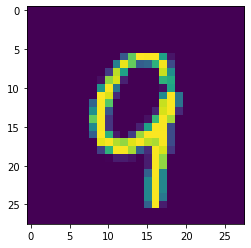

In [9]:
img = row[:784]
img = img.values.reshape(28,28)
plt.imshow(img)

### test and training sets split

In [10]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(dfCombined, 
                                    test_size=0.2,
                                    random_state=404)

In [12]:
X_train = train_df.to_numpy()[:,:784]
X_train = X_train.reshape(-1,784)
y_train = train_df['label'].values

X_test = test_df.to_numpy()[:,:784]
X_test = X_test.reshape(-1,784)
y_test = test_df['label'].values

### use SVC from sklearn as classifier

In [13]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=42, dual=False)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

### Performance

In [18]:
from collections import defaultdict
from functools import partial
from itertools import repeat
def nested_defaultdict(default_factory, depth=1):
    result = partial(defaultdict, default_factory)
    for _ in repeat(None, depth-1):
        result = partial(defaultdict, result)
    return result()

In [19]:
confusionMatrix = nested_defaultdict(int, 2)
for i in range(len(y_test_pred)):
    trueClass = y_test[i]
    predClass = y_test_pred[i]
    confusionMatrix[trueClass][predClass] += 1
print(confusionMatrix)

defaultdict(..., {7: defaultdict(<class 'int'>, {7: 187, 9: 15}), 9: defaultdict(<class 'int'>, {9: 189, 7: 9})})


In [22]:
data = [[confusionMatrix[digitA][digitA], confusionMatrix[digitA][digitB]],
        [confusionMatrix[digitB][digitA], confusionMatrix[digitB][digitB]]]
df = pd.DataFrame(data)
df.rename(columns={0:"pred=A", 1: "pred=B"}, 
          index={0:'true=A', 1:'true=B'},
         inplace=True)
print("confusionMatrix")
print(df)

confusionMatrix
        pred=A  pred=B
true=A     189       9
true=B      15     187


In [23]:
tp = confusionMatrix[digitA][digitA]
fp = confusionMatrix[digitB][digitA]
fn = confusionMatrix[digitA][digitB]
tn = confusionMatrix[digitB][digitB]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2.0/((1.0/precision)+(1.0/recall))

print("precision: ", precision)
print("recall: ", recall)
print("f1_score: ", f1_score)

precision:  0.9264705882352942
recall:  0.9545454545454546
f1_score:  0.9402985074626866


### the actual numerical output of estimator

In [25]:
y_scores = clf.decision_function(X_test)

In [34]:
signal_scores = []
background_scores = []
for i in range(len(y_test_pred)):
    if y_test[i] == digitA:
        signal_scores.append(y_scores[i])
    else:
        background_scores.append(y_scores[i])
maxScore = max(max(signal_scores), max(background_scores))
minScore = min(min(signal_scores), min(background_scores))
print("max score", np.round(maxScore,4), "; min score", np.round(minScore, 4))

max score 17.1016 ; min score -14.546


### plotting

In [35]:
from plotly.offline import iplot
import chart_studio.plotly as py
import plotly.graph_objs as go

trace0 = go.Histogram(
    x = signal_scores,
    name = 'Signal',
    opacity=0.6
)
trace1 = go.Histogram(
    x = background_scores,
    name = 'Background',
    opacity=0.6
)
data = [trace0, trace1]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='overlaid histogram')

### the ROC curve
Receiver Operation Characteristic

In [39]:
length_signal = float(len(background_scores))
length_background = float(len(signal_scores))

stepSize = (maxScore-minScore) / 100.0
threshold = minScore
fprs = []
tprs = []
thresholds = []

for steps in range(100):
    tn = 0.0
    tp = 0.0
    for score in background_scores:
        if score <= threshold:
            tn += 1.0
    for score in signal_scores:
        if score > threshold:
            tp += 1.0
    fn = length_signal- tp
    fp = length_background - tn
    tpr = tp/length_signal
    fpr = fp/length_background
    tprs.append(tpr)
    fprs.append(fpr)
    thresholds.append("Threshold="+str(threshold))
    threshold += stepSize

In [40]:
trace0 = go.Scatter(
    x = fprs,
    y = tprs,
    text = thresholds,
    mode='markers'
)
layout = dict(
    title = "ROC Curve",
    xaxis = dict(title='FPR'),
    yaxis = dict(title='TPR')
)

data = [trace0]
iplot(dict(data=data, layout=layout))

### AUC: area under the curve

In [41]:
from sklearn.metrics import auc
auc_temp = auc(fprs, tprs)
print("AUC = ", auc_temp)

AUC =  0.9544204420442044
